# SciPy

SciPy is the most used Scientific library in Python. It is well documented and easy to use, and it is fast.

It is useful for different operations, for example:
- Integration
- Optimization
- Special functions
- Interpolation
- Linear Algebra
- Signal Processing
- Statistics
- Spacial data structures and algorithms.

See all the possibilities [here](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide).

In this lesson, we well look at some examples where you use Python to solve different mathematical operations, such as integrations, equations, linear algebra. 

We will mostly use the [SciPy library](https://docs.scipy.org/doc/scipy/index.html), so please take some time to get familiar with it.

## Statistics

The `scipy.stats` [module](https://docs.scipy.org/doc/scipy/reference/stats.html) contains a large number of probability distributions, frequency statistics, correlation functions and statistical tests, and more.

We will not go through examples of this modules at this time, but it's a good idea to get familiar with the list of functions available.

## Constants

Instead of looking for a constant and manually assigning it to a value, you can use SciPy to find most!

The module you will use is `scipy.constants`, check it out [here](https://docs.scipy.org/doc/scipy/reference/constants.html).

In [18]:
# uncomment the following line
# to print the list of available constants
#scipy.constants.find()

Save the constant that you need for later use

In [20]:
import scipy.constants
res = scipy.constants.physical_constants["alpha particle mass"]
res

(6.6446573357e-27, 'kg', 2e-36)

## Integration

SciPy can be used to solve integrals, which will be very useful to you in the future when solving chemical reactions engineering exercises, so remember this functions!

Here, we will use the `quad` function, but you can check out the full guide on integration [here](https://docs.scipy.org/doc/scipy/tutorial/integrate.html).

In [1]:
import scipy.integrate

# you can use the ? to get info
scipy.integrate?

Type:        module
String form: <module 'scipy.integrate' from 'C:\\Users\\fiacac\\Anaconda3\\envs\\py38\\lib\\site-packages\\scipy\\integrate\\__init__.py'>
File:        c:\users\fiacac\anaconda3\envs\py38\lib\site-packages\scipy\integrate\__init__.py
Docstring:  
Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose N-D integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_

Let's define an example function that we will integrate

In [16]:
from math import cos, exp, pi, sin
from scipy.integrate import quad

# define a function to integrate
def f(x):
    return (2 * x * pi) + 3.2

# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)

print(f"The numerical result is {res} (+-{err})")

The numerical result is 12.8 (+-2.973287032134387e-13)


As you can see, `quad` returns two values, the first number is the value of integral and the second is the estimate of the absolute error in the value of integral.

**Exercise**: Change the function above to return the sin of the function.

Level: <span style="color:green">Easy</span>.

In [3]:
# Your code here

**Exercise**: Change the lower and upper limits of the integral. Try out a few different values (at least 5).

Level: <span style="color:green">Easy</span>.

In [4]:
# Your code here

**Exercise**: Store the numerical values you calculated before into a data structure that you prefer. Plot the values using `matplotlib`.

Level: <span style="color:orange">Medium</span>.

In [5]:
# Your code here

You can also pass the function f using a [lambda function](https://www.w3schools.com/python/python_lambda.asp).

In [23]:
f = lambda x: exp(-x**2)
integral = scipy.integrate.quad(f, 0, 1)
integral

(0.7468241328124271, 8.291413475940725e-15)

## Equations

Another package, [SymPy](https://docs.sympy.org/latest/modules/solvers/solvers.html) can be used also to solve equations, let's see how that works in a practical example.

In this example, we will calculate the experimental gas (air) hold-up and the theoretical gas hold-up for the conditions applicable in a bubble column experiment.

The gas hold-up is calculated from the equation given below.
\begin{equation}
  \frac{ɛ}{(1-ɛ)^4}= 0.2 \cdot Bo^{1/8}\cdot Ga^{1/12}\cdot Fr
\end{equation}
In which $Bo = gD^2\rho/\sigma$, $Ga = gD^3\rho^2/\eta^2$, and $Fr = v_G / \sqrt{gD}$.

In [8]:
import numpy as np
from sympy import symbols, solve

g = 9.81 # m/s^2 - gravitational constant
rho = 1000 # kg/m^3 - liquid density
sigma = 0.072 # kg/s^2 - liquid surface tension
eta = 0.00100160 # kg/s*m - dynamic viscosity of water at 20 degC
D = 0.592 # m - Internal diameter of column tube
S = np.pi * (D/2)**2 # m^2 - Cross-sectional area of column
Q = np.array([300, 600]) * 0.001 * 1/60 # m^3/s - volume flowrate

def superficialVelocity(Q, S):
    return Q/S

for air_flow in Q:
    vG = superficialVelocity(air_flow, S) # m/s
    print("vG (m/s)", vG)

    Bo = g*D**2*rho/sigma
    print("Bo:",Bo)

    Ga = g*D**3*rho**2/eta**2
    print("Ga", Ga)

    Fr = vG/np.sqrt(g*D)
    print("Fr", Fr)

    epsilon = symbols('epsilon')
    expr = 0.2*Bo**(1/8)*Ga**(1/12)*Fr-epsilon/((1-epsilon)**4)

    sol = solve(expr) # this is how to use the sympy solve package
    print(sol)
    print('Simple correlation', 0.6*vG**0.7 )
    print()

vG (m/s) 0.01816505468086826
Bo: 47750.72
Ga 2028829241903.0505
Fr 0.007537743458458121
[0.0500639495865090, 3.80475369920643, 0.0725911756035318 - 2.29010873849084*I, 0.0725911756035318 + 2.29010873849084*I]
Simple correlation 0.036275795675059605

vG (m/s) 0.03633010936173652
Bo: 47750.72
Ga 2028829241903.0505
Fr 0.015075486916916242
[0.0858654025112094, 3.27105438742610, 0.321540105031345 - 1.85929364963352*I, 0.321540105031345 + 1.85929364963352*I]
Simple correlation 0.058930203933592655



## Solving Systems of Differential Equations

We will use [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

Please take some time to read the documentation and get familiar with it.

Note that SciPy has also another package for solving ODEs: [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

You can read more on the comparison of the two packages in this blog post [here](https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/). In this course it is recommended to use scipy. integrate.solve_ivp.

In [27]:
from scipy.integrate import solve_ivp, odeint
def exponential_decay(t, y): 
    return -0.5 * y

sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])
print(sol.t)
print()
print(sol.y)

[ 0.          0.11487653  1.26364188  3.06061781  4.81611105  6.57445806
  8.33328988 10.        ]

[[2.         1.88836035 1.06327177 0.43319312 0.18017253 0.07483045
  0.03107158 0.01350781]
 [4.         3.7767207  2.12654355 0.86638624 0.36034507 0.14966091
  0.06214316 0.02701561]
 [8.         7.5534414  4.25308709 1.73277247 0.72069014 0.29932181
  0.12428631 0.05403123]]


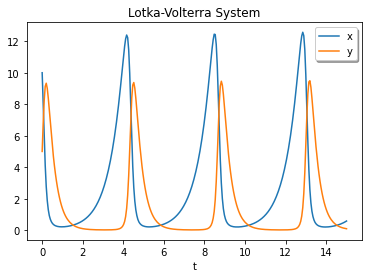

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], 
                args=(1.5, 1, 3, 1),                                  # parameter values a=1.5, b=1, c=3 and d=1 are passed with the args argument
                dense_output=True)                                           # dense_output=True computes a continuous solution

#generating t and solving the system of ODEs
t = np.linspace(0, 15, 300)
z = sol.sol(t)

# plotting the solution
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

In [1]:
round(467293847.67899, 2)

467293847.68

**Exercise**: Write your own function and use the `solve_ivp` package. Plot the values using `matplotlib`.

Level: <span style="color:orange">Medium</span>.

In [ ]:
# Your code here

## Linear Algebra

For more details, check the documentation page [here](https://docs.scipy.org/doc/scipy/tutorial/linalg.html).
We will follow the example of the [least-squares solution to equation Ax = b](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq).

What is [Least squares](https://en.wikipedia.org/wiki/Least_squares)?

In [35]:
from scipy.linalg import lstsq
import matplotlib.pyplot as plt

x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

In [32]:
# We want to fit a quadratic polynomial of the form y = a + b*x**2 to this data.
# We first form the “design matrix” M, with a constant column of 1s and a column containing x**2
M = x[:, np.newaxis]**[0, 2]
M

array([[ 1.  ,  1.  ],
       [ 1.  ,  6.25],
       [ 1.  , 12.25],
       [ 1.  , 16.  ],
       [ 1.  , 25.  ],
       [ 1.  , 49.  ],
       [ 1.  , 72.25]])

**Exercise**: What does `np.newaxis` does?

Level: <span style="color:green">Easy</span>.

We want to find the least-squares solution to M.dot(p) = y, where p is a vector with length 2 that holds the parameters a and b.

In [41]:
p, res, rnk, s = lstsq(M, y)
print('Least-squares solution', p)
print('Residues', res)
print('Effective rank of M', rnk)
print('Singular values of M', s)

Least-squares solution [0.20925829 0.12013861]
Residues 0.4082665237440342
Effective rank of M 2
Singular values of M [93.25228799  1.7883749 ]


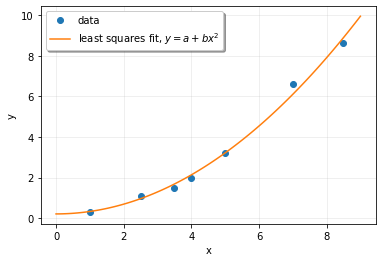

In [31]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx**2
plt.plot(xx, yy, label='least squares fit, $y = a + bx^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()